# Moons Data

In [1]:
#!/usr/bin/env python
 
# TODO Perhaps this approach actually worked and I was measuring the misclassification rate incorrectly?
# TODO Perhaps the Loss function is why this approach performed so poorly?
# TODO Implement testing and training data
  # TODO Implement a plot of both Testing and Training Data
# TODO Implement a method to intelligently exit the loop
 
#-- Import Packages -------------------------------------------
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


/tmp/ipykernel_129323/2329828251.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.show()


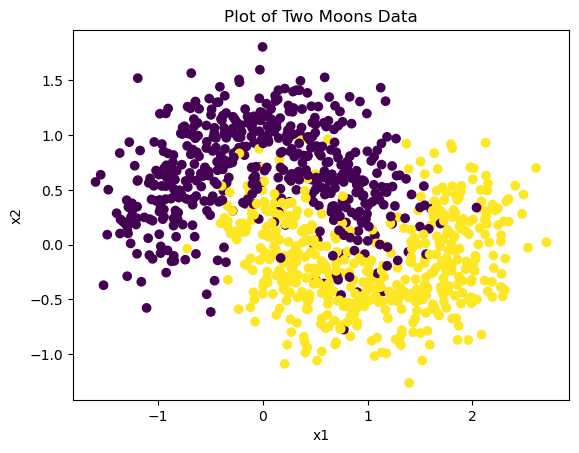

In [18]:
 
#-- Generate Two Moons Data -----------------------------------
X, y = datasets.make_moons(n_samples = 1000, noise = 0.3, random_state = 0)
y = np.reshape(y, (len(y), 1)) # Make y vertical n x 1 matrix.

## Create Tensors
device = 'cpu'
dtype = float
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))


#-- Split data into Training and Test Sets --------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
 

# Plot the Generated Data -----------------------------------
    # Make an empty figure
plt.ion()
p = plt.figure()
    # Create the Scatter Plot
plt.scatter(X[:,0], X[:, 1], c = y)
    # Labels
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot of Two Moons Data")
    # Show the Plot
p.show()
 

In [19]:
##################  PLAYING WITH WIDGETS

import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display, Javascript

In [20]:
def slider(u, l, d): 
    return widgets.IntSlider(
    value=d,
    min=l,
    max=u,
    step=1,
    description="Neurons Count:",
    disabled=False,
    continuous_update=True,
    orientation='horizontal'
)


def identity(x):
    display(x)
    return x


In [65]:
activations = [nn.ELU, nn.Hardshrink, nn.Hardsigmoid, nn.Hardtanh, nn.Hardswish, nn.LeakyReLU, nn.LogSigmoid, nn.MultiheadAttention, nn.PReLU, nn.ReLU, nn.ReLU6, nn.RReLU, nn.SELU, nn.CELU, nn.GELU, nn.Sigmoid, nn.SiLU, nn.Mish, nn.Softplus, nn.Softmin, nn.Softmax, nn.Softmax2d, nn.LogSoftmax, nn.AdaptiveLogSoftmaxWithLoss]

print("First Layer.............................................................")
hn1 = slider(100, 1, 3)
hn1 = interactive(identity, x=hn1)
display(hn1)

act1 = interactive(identity, x=activations)
display(act1)

print("Second Layer............................................................")
hn2 = slider(100, 1, 3)
hn2 = interactive(identity, x=hn2)
display(hn2)

act2 = interactive(identity, x=activations)
display(act2)

print("Third Layer.............................................................")
# hn3 = slider(10, 1, 3)
# hn3 = interactive(identity, x=hn3)
# display(hn3)

act3 = interactive(identity, x=activations)
display(act3)



First Layer.............................................................


interactive(children=(IntSlider(value=3, description='Neurons Count:', min=1), Output()), _dom_classes=('widge…

interactive(children=(Dropdown(description='x', options=(<class 'torch.nn.modules.activation.ELU'>, <class 'to…

Second Layer............................................................


interactive(children=(IntSlider(value=3, description='Neurons Count:', min=1), Output()), _dom_classes=('widge…

interactive(children=(Dropdown(description='x', options=(<class 'torch.nn.modules.activation.ELU'>, <class 'to…

Third Layer.............................................................


interactive(children=(Dropdown(description='x', options=(<class 'torch.nn.modules.activation.ELU'>, <class 'to…

In [98]:
## Run all cells below the button 

from ipywidgets import widgets

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="Run cells below")
button.on_click(run_all)

## 
display(button)

Button(description='Run cells below', style=ButtonStyle())

In [99]:
# Fit the Neural Network ------------------------------------
## Import the Packages
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

 
## Define a model
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=hn1.result),
    act1.result(),
    nn.Linear(hn1.result, hn2.result),
    act2.result(),
    nn.Linear(hn2.result, 1),
     act3.result(),
)
 
## Define a Loss Function
loss_fn = torch.nn.BCEWithLogitsLoss()
## Define an Optimizer
eta = 1e-1
optimizer = torch.optim.RMSprop(model.parameters(), lr = eta)



In [100]:
# Train the Model
losses = []
EPOCH = 1000
print("|------------------------------------------------------------------------------|")
print(" ", end='', flush=True)
for t in range(EPOCH):
    # Forward Pass: Compute predicted y value
    y_pred = model(X.float())
 
    # Measure the Loss
    loss = loss_fn(y_pred, y)
 
    # Backward Pass; Compute the Partial Derivatives
    ## First Zero the Gradients, otherwise the can't be overwritten
    optimizer.zero_grad()
 
    ## Now calculate the gradients
    loss.backward()
 
    # Adjust the Weights
    optimizer.step()
    
    # Print Progress
    if t in np.floor(np.linspace(start=0, stop=EPOCH, num=78)):
        print("#", end='', flush=True)
        # print(t, '\t', loss.item())
    

|------------------------------------------------------------------------------|
 #############################################################################

In [101]:
print(
    min(X[:,0]),
    max(X[:,0])
)

tensor(-1.5978) tensor(2.7070)


In [102]:
print(
    min(X[:,1]),
    max(X[:,1])
)

tensor(-1.2628) tensor(1.8052)


In [103]:
yu = max(X[:,0])
yl = min(X[:,0])
xu = max(X[:,1])
xl = min(X[:,1])

In [104]:
N = 100
rows = [yl + i*(yu-yl)/N for i in range(N)]
cols = [xl + i*(xu-xl)/N for i in range(N)]


In [105]:
d = np.zeros((N, N))

In [106]:
for i in range(d.shape[0]):
    for j in range(d.shape[0]):
        x1 = rows[i]
        x2 = cols[j] 
        out = model(torch.tensor([x1, x2]))
        out = torch.detach(out)
        d[i,j] = out

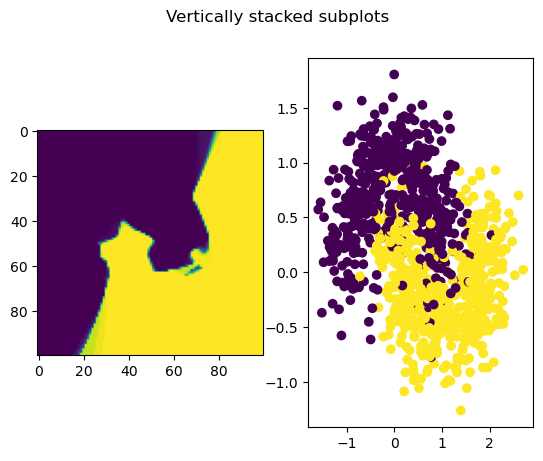

In [107]:
fig, axs = plt.subplots(1, 2)
fig.suptitle('Vertically stacked subplots')
axs[0].imshow((np.rot90(d)))
axs[1].scatter(X[:,0], X[:, 1], c = y)

(array([19.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 80.]),
 array([2.36540859e-06, 1.00001795e-01, 2.00001225e-01, 3.00000654e-01,
        4.00000084e-01, 4.99999514e-01, 5.99998943e-01, 6.99998373e-01,
        7.99997803e-01, 8.99997232e-01, 9.99996662e-01]),
 <BarContainer object of 10 artists>)

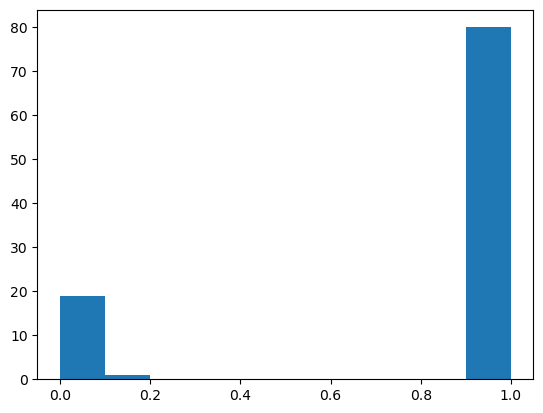

In [108]:
plt.hist(d[:,2])